# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [6]:
# your code here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
len(df)

541909

# Task 2

In [5]:
df.replace("Not Given, Error,  ", np.nan, inplace = True)

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df["CustomerID"].isnull().mean()*100

24.926694334288598

In [8]:
df["Description"].isnull().mean()*100

0.2683107311375157

In [9]:
df["Description"] = df.groupby("StockCode")["Description"].transform(lambda x: x.fillna(method = 'ffill').fillna(method = 'bfill'))

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df[df["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [12]:
df[df["Description"].isna()]["CustomerID"].unique()

array([nan])

##### Remove the remaining 112 data points which has Null description values, since the unit price is also zero. which could be highly chances for outliers it also have no customer values

In [13]:
df = df[df["UnitPrice"]>=0]

In [14]:
df = df.dropna(subset = ["Description"])

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### There are some Negative Values in Quntity and UnitPrice.  
Quantity could be due to returns.
UnitPrice could be high chances for Noise. so removing Data points that are Noise.

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134966
Country             0
dtype: int64

In [17]:
df["CustomerID"].mode()

0    17841.0
dtype: float64

# Task 3

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541795.00000,541795.000000,406829.000000
mean,9.55595,4.652919,15287.690570
std,218.10383,94.405179,1713.600303
min,-80995.00000,0.000000,12346.000000
25%,1.00000,1.250000,13953.000000
50%,3.00000,2.080000,15152.000000
75%,10.00000,4.130000,16791.000000
max,80995.00000,38970.000000,18287.000000


#### CENTRAL TENDENCY: Mean, Median, Mode

In [19]:
print(f"Mean for Quantity: {df['Quantity'].mean()}")
print(f"Mean for Unit Price: {df['UnitPrice'].mean()}")
print(f"""Median for Quantity: {df["Quantity"].median()}""")
print(f"""Median for Unit Price: {df["UnitPrice"].median()}""")
print(f"Mode for Quantity: {df['Quantity'].mode()}")
print(f"Mode for Quantity: {df['UnitPrice'].mode()}")

Mean for Quantity: 9.55595012873873
Mean for Unit Price: 4.65291871279256
Median for Quantity: 3.0
Median for Unit Price: 2.08
Mode for Quantity: 0    1
dtype: int64
Mode for Quantity: 0    1.25
dtype: float64


#### Dispersion: Range, Variance, STD

In [20]:
range_quantity = df["Quantity"].max() - df["Quantity"].min()
range_UnitPrice = df["UnitPrice"].max()  - df["UnitPrice"].min()

print(f"Range of Quantity: {range_quantity}")
print(f"Range of UnitPrice: {range_UnitPrice}")
print()
print(f"Variance of Quantity: {df['Quantity'].var()}")
print(f"Standard Deviation of Quantity: {df['Quantity'].std()}")
print()
print(f"Variance of UnitPrice: {df['UnitPrice'].var()}")
print(f"Standard Deviation of UnitPrice: {df['UnitPrice'].std()}")

Range of Quantity: 161990
Range of UnitPrice: 38970.0

Variance of Quantity: 47569.2806060693
Standard Deviation of Quantity: 218.10382987483118

Variance of UnitPrice: 8912.337886020157
Standard Deviation of UnitPrice: 94.40517933895448


# Task 4

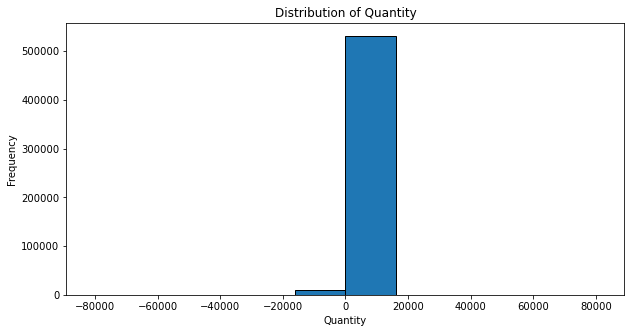

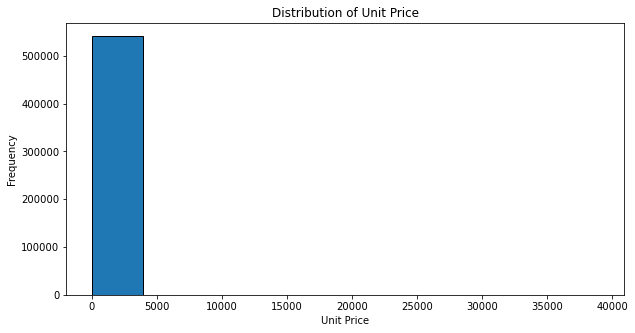

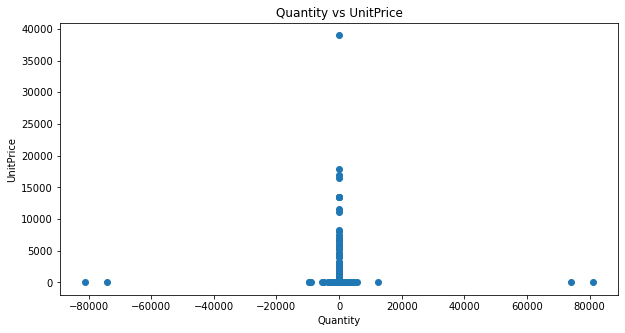

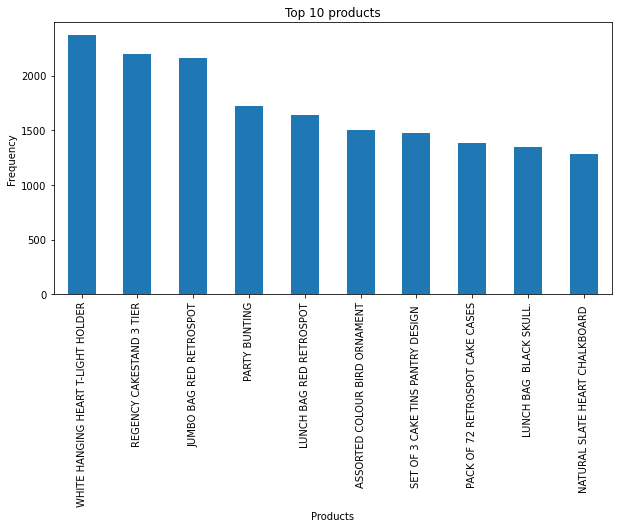

In [21]:
plt.figure(figsize = (10,5))
plt.hist(df["Quantity"], edgecolor = "black")
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (10,5))
plt.hist(df["UnitPrice"], edgecolor = "black")
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df["Quantity"], df["UnitPrice"])
plt.title("Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

top_ten_products = df["Description"].value_counts().head(10)

plt.figure(figsize = (10,5))
top_ten_products.plot(kind = "bar")
plt.title("Top 10 products")
plt.xlabel("Products")
plt.ylabel("Frequency")
plt.show()

# Task 5

In [22]:
df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

df["Sales"] = df["Quantity"]*df["UnitPrice"]

In [23]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,12,Wednesday,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12,Wednesday,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Wednesday,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Wednesday,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,12,Wednesday,54.08


In [24]:
group_by_customer = df.groupby(["CustomerID", "Month"])["Sales"].sum().reset_index()

In [24]:
group_by_customer

,CustomerID,Month,Sales
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
13410,18283.0,10,114.65
13411,18283.0,11,651.56
13412,18283.0,12,208.00
13413,18287.0,5,765.28


In [26]:
group_by_customer[group_by_customer["CustomerID"] == 17850.0]

,CustomerID,Month,Sales
12503,17850.0,2,-102.58
12504,17850.0,12,5391.21


In [27]:
(df["UnitPrice"] < 0).sum()

0

In [28]:
df[(df["CustomerID"] == 17850.0) & (df["Quantity"] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek,Sales
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,2,Thursday,-4.95
86889,C543611,22632,HAND WARMER RED RETROSPOT,-6,2011-02-10 14:38:00,1.85,17850.0,United Kingdom,2,Thursday,-11.10
86890,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,2,Thursday,-4.95
86891,C543611,21871,SAVE THE PLANET MUG,-1,2011-02-10 14:38:00,1.06,17850.0,United Kingdom,2,Thursday,-1.06
86892,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-2,2011-02-10 14:38:00,2.55,17850.0,United Kingdom,2,Thursday,-5.10
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.25,17850.0,United Kingdom,2,Thursday,-4.25
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,2,Thursday,-4.95
86895,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-12,2011-02-10 14:38:00,2.55,17850.0,United Kingdom,2,Thursday,-30.60
86896,C543611,21071,VINTAGE BILLBOARD DRINK ME MUG,-6,2011-02-10 14:38:00,1.06,17850.0,United Kingdom,2,Thursday,-6.36
86897,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-2,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,2,Thursday,-9.90


In [29]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134966
Country             0
Month               0
DayOfWeek           0
Sales               0
dtype: int64

In [30]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,12,Wednesday,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12,Wednesday,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Wednesday,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Wednesday,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,12,Wednesday,54.08


Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [31]:
sales_pmonth = df.groupby("Month")["Sales"].sum().reset_index()
Max_sales_pmonth = df.groupby("Month")["Sales"].sum().sort_values(ascending = False).reset_index()

sales_day_of_week = df.groupby("DayOfWeek")["Sales"].sum().reset_index()
Max_sales_day_of_week = df.groupby("DayOfWeek")["Sales"].sum().sort_values(ascending = False).reset_index()

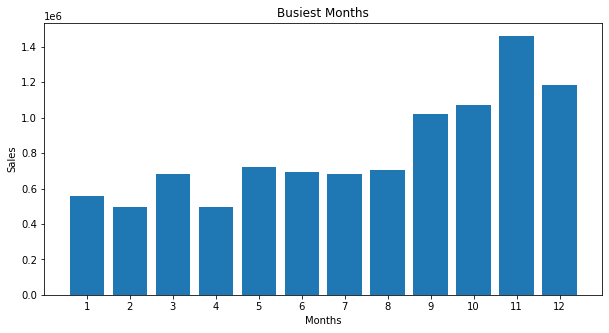

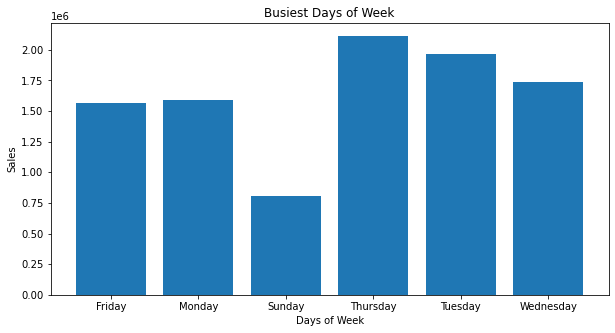

In [32]:
plt.figure(figsize = (10,5))

plt.bar(sales_pmonth["Month"].astype("str"), sales_pmonth["Sales"])
plt.title("Busiest Months")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize = (10,5))
plt.bar(sales_day_of_week["DayOfWeek"], sales_day_of_week["Sales"])
plt.title("Busiest Days of Week")
plt.xlabel("Days of Week")
plt.ylabel("Sales")
plt.show()


In [ ]:
Max_sales_day_of_week

# Task 6
Explore the top-selling products and countries based on the quantity sold.

In [ ]:
df.head(5)

In [34]:
selling_products = df.groupby("Description")["Quantity"].sum()
top_selling_products = selling_products.sort_values(ascending  = False).reset_index().head(10)

selling_countries = df.groupby("Country")["Quantity"].sum()
top_selling_countries = selling_countries.sort_values(ascending = False).reset_index().head(10)

In [35]:
top_selling_products

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,31012
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [36]:
top_selling_countries

,Country,Quantity
0,United Kingdom,4264745
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


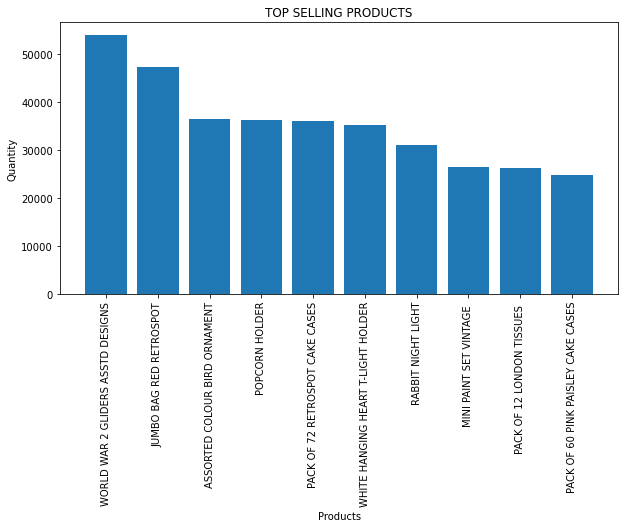

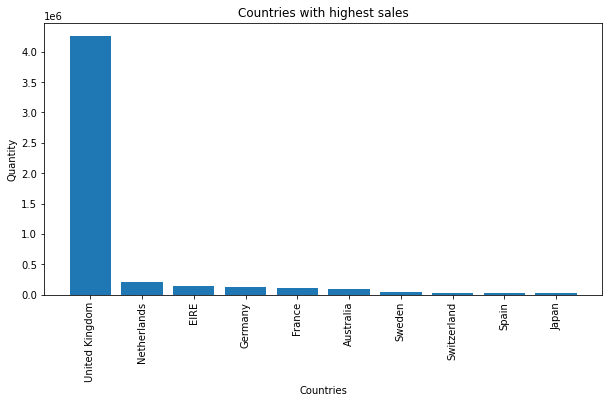

In [37]:
plt.figure(figsize = (10,5))
plt.bar(top_selling_products["Description"], top_selling_products["Quantity"])
plt.title("TOP SELLING PRODUCTS")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.xticks(rotation = 90)
plt.show()


plt.figure(figsize = (10,5))
plt.bar(top_selling_countries["Country"], top_selling_countries["Quantity"])
plt.title("Countries with highest sales")
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.xticks(rotation = 90)
plt.show()






# Task 7
Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.


In [38]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,20.34


In [39]:
Q1_Quantity = df["Quantity"].quantile(0.25)
Q3_Quantity = df["Quantity"].quantile(0.75)
IQR_Quantity = Q3_Quantity - Q1_Quantity

lower_bound_Quantity = Q1_Quantity - 1.5*IQR_Quantity
upper_bound_Quantity = Q3_Quantity + 1.5*IQR_Quantity


quantity_outliers = df[(df['Quantity'] < lower_bound_Quantity) | (df['Quantity'] > upper_bound_Quantity)]


Q1_up = df["UnitPrice"].quantile(0.25)
Q3_up = df["UnitPrice"].quantile(0.75)

IQR_up = Q3_up - Q1_up
lower_bound_up = Q1_up - 1.5* IQR_up
upper_bound_up = Q3_up +1.5* IQR_up

up_outliers = df[(df["UnitPrice"] < lower_bound_up) | (df["UnitPrice"] > upper_bound_up)]


Quantity Outliers: 58,594 out of 541,795 rows.
UnitPrice Outliers: 39,625 out of 541,795 rows.
These outliers are substantial and can impact your analysis in several ways. Here’s a breakdown:

1. Outliers in Quantity
High Positive Outliers: These may represent bulk orders or unusually large purchases. They can significantly skew measures of central tendency, such as the mean, making the typical purchase quantity appear much larger than it actually is.
Negative or Low Outliers: Negative quantities likely indicate returns or cancellations, while extremely low positive quantities could represent small sample orders or errors. Including these in total sales calculations could reduce the perceived demand or sales volume.
Impact:

Revenue Analysis: High quantities may lead to inflated sales figures if they represent wholesale or bulk purchases rather than typical transactions. Negative quantities may understate sales.
Sales Forecasting: If not handled, these outliers could lead to inaccurate forecasting by suggesting higher demand than typical.
Customer Segmentation: Bulk purchases and returns could distort average purchase behavior, potentially misclassifying customer segments.

2. Outliers in UnitPrice
High Outliers: Extremely high unit prices could indicate premium or specialty items or possible data entry errors. These values could skew the average unit price, making products appear more expensive than they typically are.
Low or Negative Outliers: Negative unit prices may represent refunds, discounts, or data errors. Very low positive prices could be sample products or minor items. These outliers could lower the average unit price if included in aggregate calculations.
Impact:

Pricing Analysis: High outliers might inflate the perceived average price, while low outliers could deflate it, leading to misinterpretations of product pricing.
Profitability Analysis: If negative prices are included without adjustment, they could distort revenue and profitability metrics.
Customer Perception: Unusual pricing outliers could mislead analyses aimed at understanding customer spending habits.




### Task 8: Draw Conclusions and Summarize Findings from the Exploratory Data Analysis

Based on the analysis conducted on the online retail dataset, here are the key findings and conclusions:

---

#### Sales Trends Over Time

- **Busiest Months**: The analysis revealed that certain months, particularly around the holiday season, see significantly higher sales. This seasonal trend suggests that sales peak during specific times of the year, likely due to increased consumer spending during holidays.
- **Busiest Days of the Week**: Sales activity also varies by day of the week, with higher sales on certain weekdays. This information can help the business strategically plan inventory and marketing efforts.

---

#### Top-Selling Products and Countries

- **Top Products**: A few products consistently sell in large quantities, indicating popular or essential items for customers. These high-demand products contribute substantially to the store's overall revenue.
- **Sales by Country**: The majority of transactions occur within the United Kingdom, followed by a few other countries. This suggests that the business has a strong domestic market presence, with potential for growth in international markets.

---

#### Customer Behavior

- By examining customer purchase patterns, it was observed that certain customers make large purchases, while others frequently return products. Identifying these behaviors can help target customer segments with personalized promotions or retention strategies.
- Additionally, the presence of bulk orders indicates a subset of customers who buy in large quantities, possibly for resale.

---

#### Outliers and Anomalies

- **Quantity Outliers**: There are substantial outliers in the quantity data, including negative values likely representing returns. High positive outliers could indicate bulk purchases. Both types of outliers can skew total sales and require separate handling to ensure accurate trend analysis.
- **Price Outliers**: Some outliers in unit prices may indicate specialty items or data entry errors. Negative prices likely represent discounts or refunds and should be treated separately to avoid distorting revenue calculations.

---

#### Key Statistical Insights

- Measures of central tendency and dispersion provided a quantitative understanding of the typical transaction size, price, and frequency. For instance, the mean and median quantities suggest that most transactions involve small product quantities, while high standard deviations indicate variability in order sizes.
- The dataset’s large range and high variance in both `Quantity` and `UnitPrice` highlight the presence of extreme values, reinforcing the need for careful outlier handling.

